In [1]:
import pandas as pd
import numpy as np
import chardet 
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import html.parser

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("E:\Aplication\CMI\MSC 2nd sem\Applied machine learning\My work\Assignment_3_regression\Data\Advertising.csv")

In [3]:
data = data.drop(columns = "Unnamed: 0")
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
TV = data.TV
radio = data.radio
newspaper = data.newspaper
sales = data.sales

# Correlation Matrix

In [5]:
corr_mat = pd.DataFrame(data.corr()["sales"][0:3])
print(corr_mat)

              sales
TV         0.782224
radio      0.576223
newspaper  0.228299


# Scatter Plot

Text(0.5, 1.0, 'newspaper vs sales')

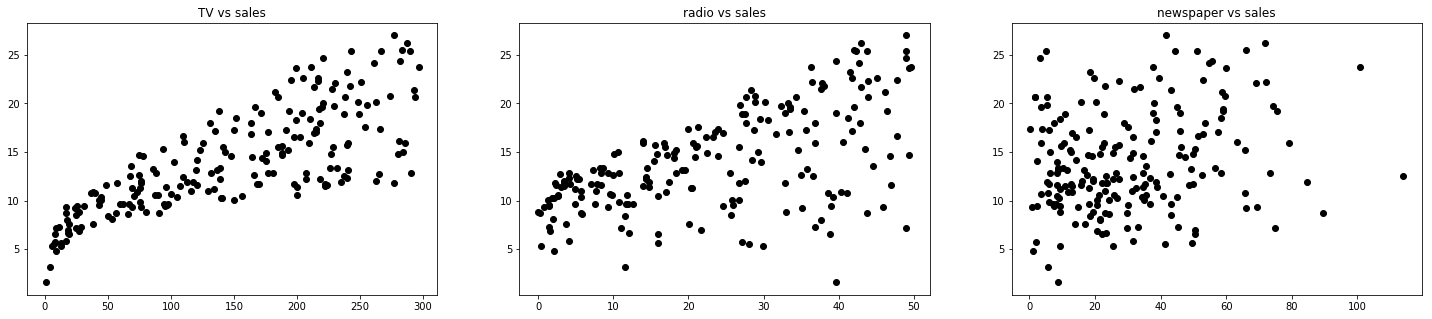

In [6]:
f, (ax1, ax2, ax3) = plt.subplots(1,3,figsize = (25 , 5))
ax1.scatter(TV, sales,  color='black')
ax1.set_title("TV vs sales")
ax2.scatter(radio, sales,  color='black')
ax2.set_title("radio vs sales")
ax3.scatter(newspaper, sales,  color='black')
ax3.set_title("newspaper vs sales")

# Regression : TV vs Sales

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           1.47e-42
Time:                        07:14:45   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

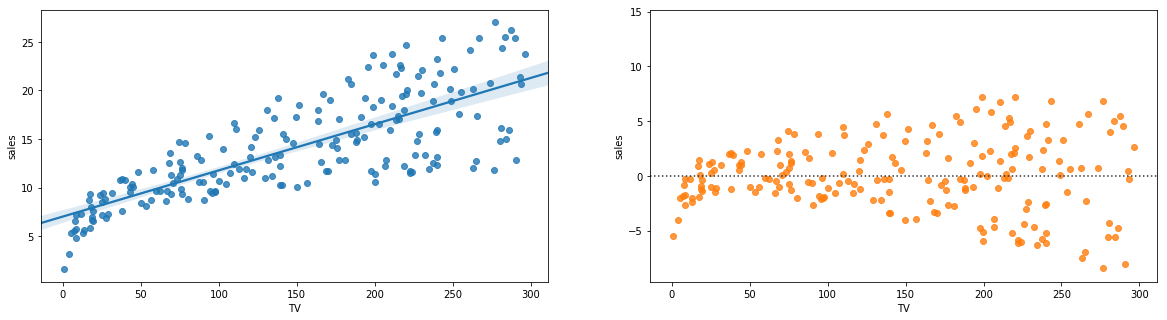

In [7]:
model_tv = ols("sales ~ TV", data = data).fit()
print(model_tv.summary())
f , ax = plt.subplots(ncols = 2, figsize = (20,5))
sns.regplot(x = 'TV', y = "sales", data = data, ax = ax[0])
sns.residplot(TV, sales, data = data, ax = ax[1])

# Regression : Radio vs Sales

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           4.35e-19
Time:                        07:14:47   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.0

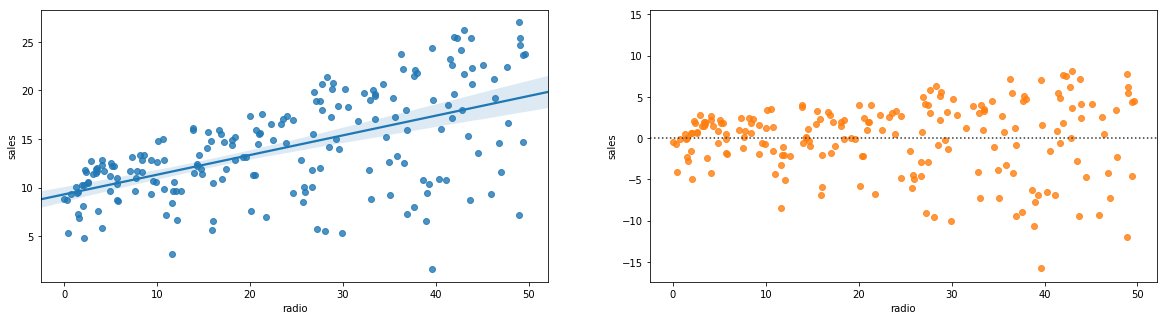

In [8]:
model_radio = ols("sales ~ radio", data = data).fit()
print(model_radio.summary())
f , ax = plt.subplots(ncols = 2, figsize = (20,5))
sns.regplot(x = 'radio', y = "sales", data = data, ax = ax[0])
sns.residplot(radio, sales, data = data, ax = ax[1])

# Regression : Newspaper vs Sales

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Thu, 07 Feb 2019   Prob (F-statistic):            0.00115
Time:                        07:14:48   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.0

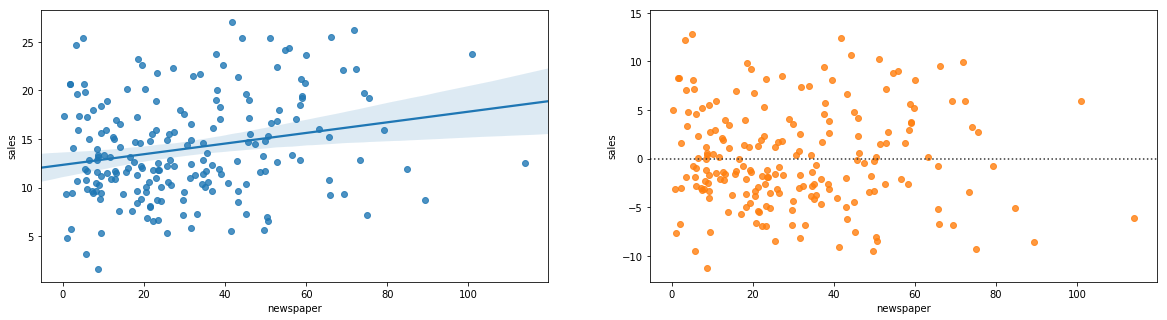

In [9]:
model_np = ols("sales ~ newspaper", data = data).fit()
print(model_np.summary())
f , ax = plt.subplots(ncols = 2, figsize = (20,5))
sns.regplot(x = 'newspaper', y = "sales", data = data, ax = ax[0])
sns.residplot(newspaper, sales, data = data, ax = ax[1])

# Regression: TV and Radio vs Sales

In [10]:
model_np = ols("sales ~ TV*radio", data = data).fit()
print(model_np.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Thu, 07 Feb 2019   Prob (F-statistic):          6.68e-146
Time:                        07:14:48   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.0

# Regression: TV and Newspaper vs Sales

In [11]:
model_np = ols("sales ~ TV*newspaper", data = data).fit()
print(model_np.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     120.6
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           2.84e-44
Time:                        07:14:49   Log-Likelihood:                -509.12
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     196   BIC:                             1039.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.4042      0.733      8.732   

# Regression: Radio and Newspaper vs Sales

In [12]:
model_np = ols("sales ~ newspaper*radio", data = data).fit()
print(model_np.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     32.70
Date:                Thu, 07 Feb 2019   Prob (F-statistic):           3.51e-17
Time:                        07:14:49   Log-Likelihood:                -573.11
No. Observations:                 200   AIC:                             1154.
Df Residuals:                     196   BIC:                             1167.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.7905      1.022     

# Fitting Linear Regression Model

From the above analysis we can see that newspaper and sales don't have linear relation between them. So while training a linear regression model we are only considering TV and Radio to predict the Sales.

In [13]:
x = pd.DataFrame(list(zip(TV, radio)), columns = ['TV_train', 'radio_train'])
y = pd.DataFrame(sales)
x_train, x_test, y_train, y_test = train_test_split( x , y , random_state = 69)


In [14]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
y_pred = model.predict(x_test)

In [16]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

1.481835005938601
